In [ ]:
# https://www.tensorflow.org/tutorials/keras/classification

In [1]:
# This guide trains a neural network model to classify images of clothing, like sneakers and shirts. It's okay if you don't understand all the details; this is a fast-paced overview of a complete TensorFlow program with the details explained as you go.

# This guide uses tf.keras, a high-level API to build and train models in TensorFlow.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


In [3]:
# Import the Fasion MNIST dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [5]:
# Loading the dataset returns four NumPy arrays:

# The train_images and train_labels arrays are the training set—the data the model uses to learn.
# The model is tested against the test set, the test_images, and test_labels arrays.
# The images are 28x28 NumPy arrays, with pixel values ranging from 0 to 255. The labels are an array of integers, ranging from 0 to 9. These correspond to the class of clothing the image represents:

# Label	Class
# 0	T-shirt/top
# 1	Trouser
# 2	Pullover
# 3	Dress
# 4	Coat
# 5	Sandal
# 6	Shirt
# 7	Sneaker
# 8	Bag
# 9	Ankle boot

In [6]:
# Each image is mapped to a single label. Since the class names are not included with the dataset, store them here to use later when plotting the images:

class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
                'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [8]:
# Exploring the format of the dataset before training the model.
# There are 60000 images in the training set, each image represented as 28 x 28 pixels.
train_images.shape

(60000, 28, 28)

In [9]:
# Length of labels in the training set (also 60k)
len(train_labels)

60000

In [10]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [11]:
test_images.shape

(10000, 28, 28)

In [12]:
len(test_labels)

10000

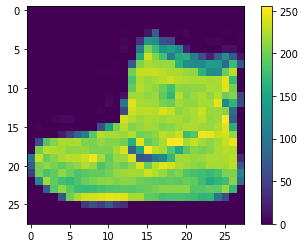

In [15]:
# Preprocess the data
# The data must be preprocessed before training the network. If you inspect the first image in the training set, you will see that the pixel values fall in the range of 0 to 255:

plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
# Scale these values to a range of 0 to 1 before feeding them to the neural network model. To do so, divide the values by 255. It's important that the training set and the testing set be preprocessed in the same way:

train_images = train_images / 255.0
test_images = test_images / 255.0